In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteZ0NU15/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [4]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [5]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 928s 636ms/step - loss: 0.0478 - accuracy: 0.9828


In [17]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

1/1 [==============================] - 1s 1s/step


Text(0.5, 1.0, 'КОТ -11.325149536132812')

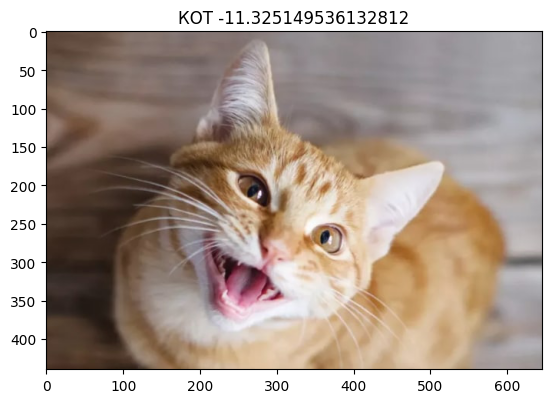

In [10]:
img = load_img('11.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'КОТ' if prediction < 0 else 'СОБАКА'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

In [18]:
for i in range(37):
  img = load_img(f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'КОТ' if prediction < 0 else 'СОБАКА'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')

Output hidden; open in https://colab.research.google.com to view.